In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# zavantagennya dannyh

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



4422102/4422102 [==============================] - 0s 0us/step


In [21]:
def create_model (activation = 'relu', neurons = 256, canals = 128, optimizer = 'RMSprop'):
  model = Sequential([
      layers.Conv2D(canals, (3, 3), activation=activation, input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(canals, (3, 3), activation=activation),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(canals*2, (3, 3), activation=activation),

      layers.Flatten(),

      layers.Dense(neurons, activation=activation),

      layers.Dense(10, activation='softmax')
      ])

  model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

  return(model)

**1. Підбір кількості кроків згортки**

In [ ]:
layerc = layers.Conv2D(64, (3, 3), activation="relu")
layerm = layers.MaxPooling2D((2, 2))
info = {}

for i in range(2):
    list = [layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)), layers.MaxPooling2D((2, 2))]
    for j in range(i):
        list.append(layerc)
        list.append(layerm)
    list.append(layers.Conv2D(64, (3, 3), activation="relu"))
    list.append(layers.Flatten())
    list.append(layers.Dense(64, activation='relu'))
    list.append(layers.Dense(10, activation='softmax'))

    print(list)

    model = Sequential(list)

    model.compile(optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])

    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    info.update({i+1: f': loss{test_loss}, accuracy{test_accuracy}'})

print(info)

[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x79179425ec20>, <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x791777763df0>, <keras.src.layers.convolutional.conv2d.Conv2D object at 0x79179425fac0>, <keras.src.layers.reshaping.flatten.Flatten object at 0x79179425fc10>, <keras.src.layers.core.dense.Dense object at 0x79179425f520>, <keras.src.layers.core.dense.Dense object at 0x79179425e2c0>]
Epoch 1/5
938/938 [==============================] - 52s 54ms/step - loss: 0.4291 - accuracy: 0.8470
Epoch 2/5
938/938 [==============================] - 51s 54ms/step - loss: 0.2741 - accuracy: 0.9004
Epoch 3/5
938/938 [==============================] - 49s 53ms/step - loss: 0.2302 - accuracy: 0.9161
Epoch 4/5
938/938 [==============================] - 50s 54ms/step - loss: 0.1987 - accuracy: 0.9265
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2236 - accuracy: 0.9208
[<keras.src.layers.convolutional.conv2d.Conv2D object at 0x791797569ba0>, <

Два шари прекрасно підходять для нашої моделі

**2. Підбір функції активації**

In [ ]:
activations = ['softmax', 'softplus',
              'relu', 'tanh', 'sigmoid', 'hard_sigmoid']

info = {}

for activation in activations:
    model = create_model(activation=activation)
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    info.update({activation: f'loss{test_loss}, accuracy{test_accuracy}'})

print(info)

Epoch 1/5
938/938 [==============================] - 66s 69ms/step - loss: 2.3028 - accuracy: 0.1006
Epoch 2/5
938/938 [==============================] - 64s 69ms/step - loss: 2.3028 - accuracy: 0.0983
Epoch 3/5
938/938 [==============================] - 64s 68ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 4/5
938/938 [==============================] - 64s 69ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 1/5
938/938 [==============================] - 72s 76ms/step - loss: 0.9743 - accuracy: 0.6298
Epoch 2/5
938/938 [==============================] - 69s 74ms/step - loss: 0.5006 - accuracy: 0.8118
Epoch 3/5
938/938 [==============================] - 69s 74ms/step - loss: 0.4277 - accuracy: 0.8393
Epoch 4/5
938/938 [==============================] - 71s 76ms/step - loss: 0.3826 - accuracy: 0.8571
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.3852 - accuracy:

Найкраще підходять функції 'relu'та 'tanh', так як вони мають майже однакові показники як по часу так і по якост навчання.

**3. Підбір оптимізатора**

In [10]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Adamax']

info = {}

for optimizer in optimizers:
    model = create_model(optimizer=optimizer)
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    info.update({optimizer: f'loss{test_loss}, accuracy{test_accuracy}'})

print(info)

Epoch 1/5
938/938 [==============================] - 45s 48ms/step - loss: 1.2423 - accuracy: 0.5660
Epoch 2/5
938/938 [==============================] - 44s 47ms/step - loss: 0.6700 - accuracy: 0.7473
Epoch 3/5
938/938 [==============================] - 51s 55ms/step - loss: 0.5752 - accuracy: 0.7850
Epoch 4/5
938/938 [==============================] - 48s 51ms/step - loss: 0.5223 - accuracy: 0.8065
Epoch 5/5
313/313 [==============================] - 4s 10ms/step - loss: 0.4894 - accuracy: 0.8243
Epoch 1/5
938/938 [==============================] - 42s 44ms/step - loss: 0.5647 - accuracy: 0.7928
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.3463 - accuracy: 0.8726
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 0.2942 - accuracy: 0.8917
Epoch 4/5
938/938 [==============================] - 40s 42ms/step - loss: 0.2640 - accuracy: 0.9031
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.2918 - accuracy: 

Показники дають нам обирати між 'RMSprop' та 'Adam', але перший показує швидше навчання і на багатьох епохах це дасть свою перевагу

**4. Підбір кількості нейронів**

In [13]:
import time

neurons = [16, 32, 64, 128, 256, 512]

info = {}

for neuron in neurons:
    start = time.time()
    model = create_model(neurons = neuron)
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    end = time.time() - start
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    info.update({neuron: f'time: {end}, loss: {test_loss}, accuracy: {test_accuracy}'})

print(info)

Epoch 1/5
938/938 [==============================] - 41s 43ms/step - loss: 0.6498 - accuracy: 0.7576
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.4009 - accuracy: 0.8543
Epoch 3/5
938/938 [==============================] - 39s 41ms/step - loss: 0.3400 - accuracy: 0.8772
Epoch 4/5
938/938 [==============================] - 40s 42ms/step - loss: 0.3085 - accuracy: 0.8885
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3073 - accuracy: 0.8853
Epoch 1/5
938/938 [==============================] - 42s 43ms/step - loss: 0.5931 - accuracy: 0.7865
Epoch 2/5
938/938 [==============================] - 40s 43ms/step - loss: 0.3731 - accuracy: 0.8656
Epoch 3/5
938/938 [==============================] - 40s 42ms/step - loss: 0.3240 - accuracy: 0.8819
Epoch 4/5
938/938 [==============================] - 40s 43ms/step - loss: 0.2962 - accuracy: 0.8920
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.3032 - accuracy: 0

Найкраще модель проявила себе на навчання на 256 нейронах

**5. Підбір кількості каналів згортки**

In [14]:
canals = [32, 64, 128]

info = {}

for canal in canals:
    start = time.time()
    model = create_model(canals = canal)
    model.fit(train_images, train_labels, epochs=5, batch_size=64)
    end = time.time() - start
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    info.update({canal: f'time: {end}, loss: {test_loss}, accuracy: {test_accuracy}'})

print(info)

Epoch 1/5
938/938 [==============================] - 41s 43ms/step - loss: 0.5533 - accuracy: 0.7960
Epoch 2/5
938/938 [==============================] - 40s 43ms/step - loss: 0.3536 - accuracy: 0.8706
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.3085 - accuracy: 0.8863
Epoch 4/5
938/938 [==============================] - 39s 41ms/step - loss: 0.2780 - accuracy: 0.8985
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2777 - accuracy: 0.8986
Epoch 1/5
938/938 [==============================] - 88s 93ms/step - loss: 0.5123 - accuracy: 0.8125
Epoch 2/5
938/938 [==============================] - 84s 89ms/step - loss: 0.3255 - accuracy: 0.8821
Epoch 3/5
938/938 [==============================] - 85s 91ms/step - loss: 0.2777 - accuracy: 0.8982
Epoch 4/5
938/938 [==============================] - 85s 90ms/step - loss: 0.2452 - accuracy: 0.9096
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 0.2721 - accuracy:

Найкраще модель проявила себе на 64 каналах, якщо співвідносити час та якість навчання.

**6. Підбір розміру батчу**

In [15]:
model = create_model()

batch_size = [16, 64, 128, 256, 512]

for batch in batch_size:
  model.fit(train_images, train_labels, epochs=5, batch_size=batch)
  end = time.time() - start
  test_loss, test_accuracy = model.evaluate(test_images, test_labels)
  info.update({batch: f'time: {end}, loss: {test_loss}, accuracy: {test_accuracy}'})

print(info)

Epoch 1/5
3750/3750 [==============================] - 59s 15ms/step - loss: 0.4797 - accuracy: 0.8231
Epoch 2/5
3750/3750 [==============================] - 57s 15ms/step - loss: 0.3241 - accuracy: 0.8809
Epoch 3/5
3750/3750 [==============================] - 57s 15ms/step - loss: 0.2775 - accuracy: 0.8975
Epoch 4/5
3750/3750 [==============================] - 56s 15ms/step - loss: 0.2498 - accuracy: 0.9073
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.2761 - accuracy: 0.9021
Epoch 1/5
938/938 [==============================] - 41s 43ms/step - loss: 0.1759 - accuracy: 0.9342
Epoch 2/5
938/938 [==============================] - 39s 42ms/step - loss: 0.1648 - accuracy: 0.9379
Epoch 3/5
938/938 [==============================] - 40s 43ms/step - loss: 0.1573 - accuracy: 0.9407
Epoch 4/5
938/938 [==============================] - 40s 42ms/step - loss: 0.1472 - accuracy: 0.9448
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2788 - ac

Найкраще використовувати батч розміром 128

**7. Підбір кількості епох**

In [19]:
model = create_model()

history = model.fit(train_images, train_labels, epochs=15, batch_size=128,validation_data=(test_images, test_labels))

Epoch 1/15
469/469 [==============================] - 286s 607ms/step - loss: 0.5522 - accuracy: 0.7927 - val_loss: 0.3665 - val_accuracy: 0.8665
Epoch 2/15
469/469 [==============================] - 265s 565ms/step - loss: 0.3089 - accuracy: 0.8869 - val_loss: 0.3346 - val_accuracy: 0.8811
Epoch 3/15
469/469 [==============================] - 258s 550ms/step - loss: 0.2583 - accuracy: 0.9043 - val_loss: 0.2936 - val_accuracy: 0.8953
Epoch 4/15
469/469 [==============================] - 257s 548ms/step - loss: 0.2231 - accuracy: 0.9176 - val_loss: 0.2971 - val_accuracy: 0.8926
Epoch 5/15
469/469 [==============================] - 268s 571ms/step - loss: 0.1952 - accuracy: 0.9272 - val_loss: 0.2670 - val_accuracy: 0.9060
Epoch 6/15
469/469 [==============================] - 314s 671ms/step - loss: 0.1698 - accuracy: 0.9361 - val_loss: 0.2678 - val_accuracy: 0.9012
Epoch 7/15
469/469 [==============================] - 312s 665ms/step - loss: 0.1487 - accuracy: 0.9441 - val_loss: 0.2517 -

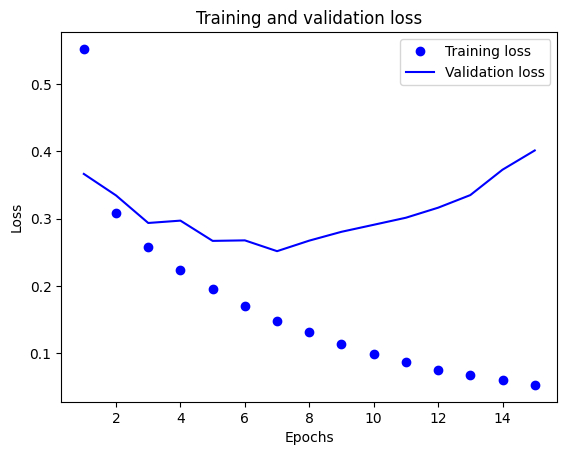

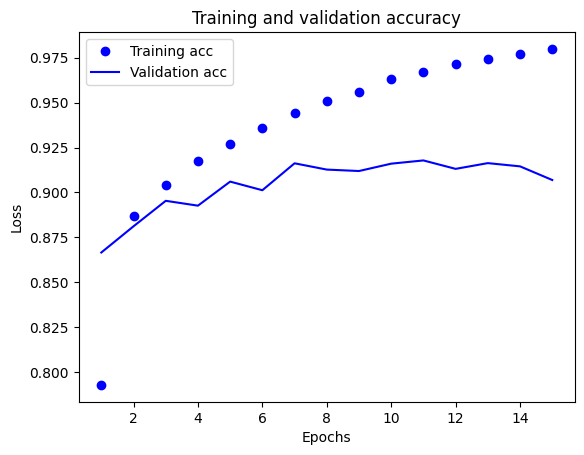

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

З отриманих графіків видно, що оптимальною є кількість епох, що дорівнюють 7, так як далі відбувається перенавчання

**Кінцева модель**

In [23]:
model = Sequential([
      layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(64, (3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(128, (3, 3), activation='relu'),

      layers.Flatten(),

      layers.Dense(256, activation='relu'),

      layers.Dense(10, activation='softmax')
      ])

model.compile(optimizer='RMSprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=7, batch_size=128)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/7
469/469 [==============================] - 104s 219ms/step - loss: 0.5673 - accuracy: 0.7885
Epoch 2/7
469/469 [==============================] - 96s 204ms/step - loss: 0.3318 - accuracy: 0.8788
Epoch 3/7
469/469 [==============================] - 97s 206ms/step - loss: 0.2754 - accuracy: 0.8990
Epoch 4/7
469/469 [==============================] - 97s 206ms/step - loss: 0.2419 - accuracy: 0.9109
Epoch 5/7
469/469 [==============================] - 98s 209ms/step - loss: 0.2162 - accuracy: 0.9196
Epoch 6/7
469/469 [==============================] - 107s 228ms/step - loss: 0.1935 - accuracy: 0.9281
Epoch 7/7
313/313 [==============================] - 6s 20ms/step - loss: 0.2584 - accuracy: 0.9103


313/313 [==============================] - 12s 38ms/step


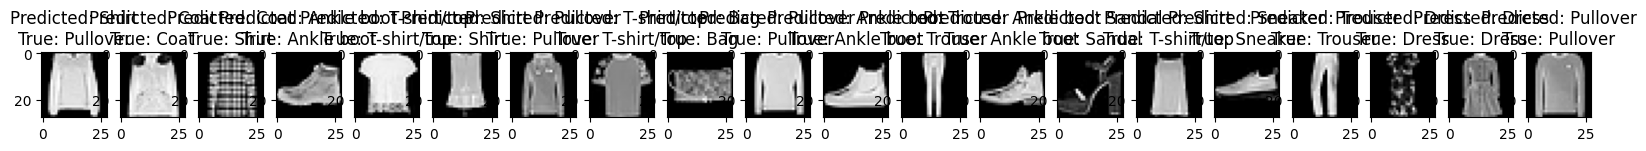

In [25]:
fashion_mnist_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


X_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

predictions = model.predict(X_test)

num_samples = 20
random_indices = np.random.choice(len(X_test), num_samples, replace=False)



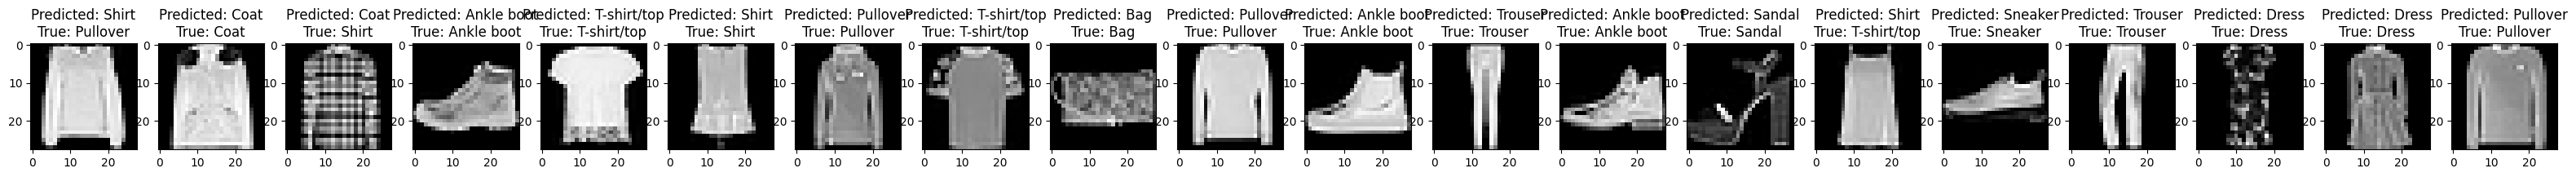

In [27]:
plt.figure(figsize=(40, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = fashion_mnist_labels[np.argmax(predictions[idx])]
    true_label = fashion_mnist_labels[np.argmax(test_labels[idx])]
    plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')

plt.show()

За результатами навчання можна зробити висновки, що Використання згорткових nn є більш доцільним ніж просто багатошарових nn так як за жодних гіперпараметрів не вдавалось отримати точність вище за 90 відсотків в порівнянні з точністю в 91% з данною архітектурю мережі